In [1]:
from rdkit import Chem
import tmap as tm
from pandarallel import pandarallel
import numpy as np
pandarallel.initialize(nb_workers=2,progress_bar=False)
import pandas as pd
from map4.map4 import MAP4Calculator
from scipy.spatial import distance
folder = "/media/data/software/database/mibig_3.1"

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
map4_instance = MAP4Calculator(dimensions=1024)
def calc_map4(smiles):
    mol = Chem.MolFromSmiles(smiles)
    smiles = Chem.MolToSmiles(mol, isomericSmiles=False)
    mol = Chem.MolFromSmiles(smiles)
    map4 = map4_instance.calculate(mol)
    return np.array(map4)

def get_distance(a, b):
    """Estimates the Jaccard distance of two binary arrays based on their hashes,
    which measures dissimilarity between sample sets, is complementary to the 
    Jaccard coefficient and is obtained by subtracting the Jaccard coefficient from 1.

    Arguments:
      a {numpy.ndarray} -- An array containing hash values.
      b {numpy.ndarray} -- An array containing hash values.

    Returns:
      float -- The estimated Jaccard distance.
    """

    # The Jaccard distance of Minhashed values is estimated by
    return 1.0 - float(np.count_nonzero(a == b)) / float(len(a))

Load Database

In [3]:
coconut = folder + '/mibig_3.1_filtered_prop.pkl'
with open(coconut, 'rb') as file:
    df = pd.read_pickle(file)

if not isinstance(df, pd.DataFrame):
    raise ValueError("The loaded pickle file does not contain a DataFrame")
    
if 'MAP4' not in df.columns:
    raise ValueError("The DataFrame does not contain a MAP4 column")

Define input and output

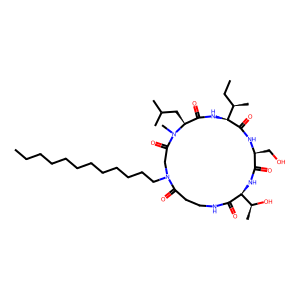

In [39]:
query_smiles = 'O=C1CCNC([C@H]([C@@H](O)C)NC([C@H](CO)NC([C@H]([C@@H](CC)C)NC([C@H](CC(C)C)N(C)C(CN1CCCCCCCCCCCC)=O)=O)=O)=O)=O'#@param {type:"string"}
#@markdown - Before you press the little ▶ play icon insert the input molecue as SMILES next to `query_smiles`.
threshold = 0.85  # @param {type:"number"}
#@markdown - The `threshold` indicates the dissimilarity between your query molecule and those in the database. It ranges from 0 to 1, with 1 representing the highest degree of dissimilarity.

fingerprint = calc_map4(query_smiles)
draw_input_molecule = True #@param {type:"boolean"}

if draw_input_molecule == True:
  from rdkit.Chem import Draw
  mol = Chem.MolFromSmiles(query_smiles)
  img = Draw.MolToImage(mol)
  display(img)

Calculate distances

In [40]:
rows_with_distance = []
for index, map4_ in enumerate(df['MAP4']):
    dist = distance.jaccard(fingerprint, map4_)
    if dist < threshold:
        row_dict = df.iloc[index].to_dict()
        row_dict['distance'] = dist
        rows_with_distance.append(row_dict)

result_df = pd.DataFrame(rows_with_distance)

# Check if the 'Distance' column exists before filtering
if 'distance' in result_df.columns:
  filtered_df = result_df[result_df['distance'].notna()]
  filtered_df.head()
else:
  print("No similar molecules found within the specified threshold.")
  filtered_df = pd.DataFrame()  # Create an empty DataFrame if no similar molecules are found

In [41]:
# Assuming rows_with_distance is already defined and contains your data
result_df = pd.DataFrame(rows_with_distance)

# Filter out rows where 'Distance' is not NaN
filtered_df = result_df[result_df['distance'].notna()]

# Sort the filtered DataFrame by the 'Distance' column
sorted_df = filtered_df.sort_values(by='distance')

# Optionally, you can reset the index if desired
sorted_df.reset_index(drop=True, inplace=True)

In [42]:
sorted_df

,biosyn_class,compounds,loci.accession,loci.completeness,loci.end_coord,loci.start_coord,mibig_accession,ncbi_tax_id,organism_name,publications,...,MAP4,fcsp3,HBA,HBD,aLogP,MW,isLipinski,isPeptide,hasSugar,distance
0,"[NRP, Polyketide]","[{'chem_acts': [{'activity': 'cytotoxic'}, {'a...",KF647219.1,complete,NaN,NaN,BGC0000346,334858,Goodfellowiella coeruleoviolacea,"[pubmed:24168704, pubmed:1468981, pubmed:10465...",...,"[3905893, 10991550, 13801384, 2543938, 3838903...",0.821429,7,4,1.16480,554.367950,1,1,0,0.802734
1,[NRP],"[{'chem_acts': [{'activity': 'siderophore'}], ...",CP002039.1,complete,2687402.0,2645251.0,BGC0000424,757424,Herbaspirillum seropedicae SmR1,[pubmed:23320867],...,"[1546832, 763518, 99402, 3194581, 933264, 4799...",0.756757,15,14,-4.13570,877.428044,0,1,0,0.815430
2,[NRP],[{'chem_struct': 'CCCCCCCC(O)CC(=O)NC(CC(C)C)C...,MN480426.1,Unknown,34614.0,1.0,BGC0002548,306,Pseudomonas sp.,"[pubmed:31744250, doi:10.3390/molecules24224170]",...,"[1020979, 763518, 99402, 100375, 252573, 98905...",0.803922,13,11,1.61910,1038.657650,0,1,0,0.825195
3,[NRP],[{'chem_struct': 'CCCCCCC[C@@H](O)CC(=O)N[C@@H...,NZ_PHSU01000004.1,complete,316980.0,289715.0,BGC0002071,2056244,Pseudomonas sp. QS1027,[doi:10.1039/c9sc03633d],...,"[1546832, 1120661, 99402, 100375, 1446404, 226...",0.811321,12,12,2.20520,1067.720584,0,1,0,0.827148
4,[NRP],[{'chem_struct': 'CC[C@H](C)CCCCCCCCCCC(=O)N[C...,KP742486.1,Unknown,57000.0,1.0,BGC0002611,1810919,Aspergillus mulundensis,[pubmed:26024901],...,"[2326260, 1699774, 99402, 391704, 3053269, 972...",0.729167,16,14,-2.58530,1007.542679,0,1,0,0.828125
5,[NRP],[{'chem_struct': 'CCCCCCC[C@H](CC(=O)N[C@@H](C...,MT577358.1,Unknown,38612.0,1.0,BGC0002522,306,Pseudomonas sp.,[pubmed:32698413],...,"[1546832, 1120661, 99402, 100375, 252573, 1303...",0.796296,15,13,-0.50310,1124.705662,0,1,0,0.829102
6,[NRP],[{'chem_struct': '[H][C@@]12CCCN1C(=O)[C@@H](C...,GL698760.1,complete,NaN,NaN,BGC0000337,655844,Metarhizium robertsii ARSEF 23,"[pubmed:22232661, pubmed:3268274]",...,"[9259343, 1331289, 4281186, 4999426, 5133567, ...",0.724138,7,2,0.84600,577.347549,1,1,0,0.830078
7,[NRP],"[{'chem_acts': [{'activity': 'antibacterial'},...",AJ575642.1,complete,NaN,NaN,BGC0000433,326423,Bacillus velezensis FZB42,[pubmed:14762003],...,"[1546832, 763518, 99402, 391704, 35913, 114448...",0.807692,11,9,4.79630,1021.667486,0,1,0,0.830078
8,[NRP],[{'chem_struct': 'CCCCCC[C@H](C)[C@H]1OC(=O)[C...,BN001307.1,Unknown,4267876.0,4230453.0,BGC0001290,227321,Aspergillus nidulans FGSC A4,[pubmed:26184239],...,"[5398056, 1699774, 5974386, 391704, 1063302, 3...",0.806452,7,5,1.95170,609.410149,1,1,0,0.831055
9,[NRP],[{'chem_struct': 'CCCCCCCCCCCCCC(N[C@H](CC(C)C...,NC_013892.1,complete,2347906.0,2336399.0,BGC0002135,406818,Xenorhabdus bovienii SS-2004,[pubmed:34581573],...,"[1837473, 1699774, 99402, 4878536, 5931255, 12...",0.827586,5,6,3.14170,568.431219,0,1,0,0.833008


In [43]:
sorted_df.to_csv('out/glob_G2d_0.85.csv', index=False)